# Importing Data from Various Sources in Sysbio
Hao Zhu  
2019-09-17

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/haozhu233%2Fgetting-started-with-computational-systembio/master)

## Introduction
Research data in system biology, at least in Professor Hassoun's lab, usually comes from multiple sources. In this notebook, we are providing an overview of these sources and some code examples of reading data from these resources. 

In general, our data can be split into the following categories:

- **Compound Data**
    - Fingerprint of features is usually used to represent basic chemical compound. 
    - Compounds are usually coded in the [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) format. 
    - **Datasets:** 
        - [rdkit.Chem](https://www.rdkit.org/docs/source/rdkit.Chem.html)
        - [PubChem](https://pubchem.ncbi.nlm.nih.gov/)
- **Protein Domain Data** 
    - Proteins are usually coded in the [FASTA](https://zhanglab.ccmb.med.umich.edu/FASTA/) format.
    - In order to understand the structure of protein, we can represent protein in the unit of [protein domains](https://en.wikipedia.org/wiki/Protein_domain). However, how to split the protein into domains is a problem
    - Technically, the items listed below are not "datasets". Instead, they are trained models (mostly using Hidden Markov Models or HMM).
    - These tools usually offer web interface and REST API but the processing takes time. 
    - **Tools:** 
        - [InterPro](https://www.ebi.ac.uk/)
        - [Blast](https://blast.ncbi.nlm.nih.gov/Blast.cgi)
        - [PFam](https://pfam.xfam.org/), which is included in Interpro
        - PROSITE, PRINTS, ProDom, SMART, TIGRFAM, PIRSF, SUPERFAMILY, PANTHER, CATH-Gene3D, HAMAP, CDD, SFLD
        - (If any particular datasets are of our special interest, please feel free to add some documentations here.) 
- **Interaction Data**
    - Interaction datasets include the interaction results between protein-compound and protein-protein. 
    - **Datasets:** 
        - [STITCH](http://stitch.embl.de/)

## Reading Compound Data
In the example below, you will see how to read molecular and atomic data from SMILES using `rdkit.Chem` and `PubChem` REST API. 

### rdkit.Chem 
Here I presume you have already installed rdkit. If not, please follow the instructions on the [website](https://www.rdkit.org/docs/Install.html). 

In [26]:
from rdkit import Chem
import numpy as np

In [35]:
smiles = 'C(C(=O)C(=O)CBr)Br'
mol = Chem.MolFromSmiles(smiles)
print(Chem.MolToMolBlock(mol))


     RDKit          2D

  8  7  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -1.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1962   -0.0000    0.0000 Br  0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 Br  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  2  4  1  0
  4  5  2  0
  4  6  1  0
  6  7  1  0
  1  8  1  0
M  END



In [30]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol())

C
C
O
C
O
C
Br
Br


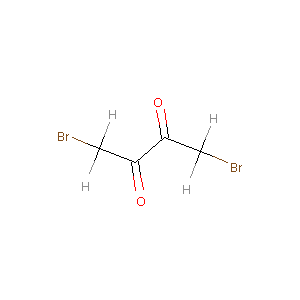

In [37]:
from rdkit.Chem import Draw
mol2 = Chem.AddHs(mol)
Draw.MolToImage(mol2)

For more functionalities, see the website: https://www.rdkit.org/docs/GettingStartedInPython.html

### PubChem

In [39]:
import pubchempy as pcp

In [54]:
mol_cid = pcp.get_cids(smiles, "smiles")

In [56]:
mol_pcp = pcp.Compound.from_cid(mol_cid)

In [58]:
mol_pcp.to_dict(properties=['atoms', 'bonds', 'inchi'])

{'atoms': [{'aid': 1, 'number': 35, 'element': 'Br', 'x': 2, 'y': -0.25},
  {'aid': 2, 'number': 35, 'element': 'Br', 'x': 6.3301, 'y': 0.25},
  {'aid': 3, 'number': 8, 'element': 'O', 'x': 3.732, 'y': -1.25},
  {'aid': 4, 'number': 8, 'element': 'O', 'x': 4.5981, 'y': 1.25},
  {'aid': 5, 'number': 6, 'element': 'C', 'x': 3.732, 'y': -0.25},
  {'aid': 6, 'number': 6, 'element': 'C', 'x': 4.5981, 'y': 0.25},
  {'aid': 7, 'number': 6, 'element': 'C', 'x': 2.866, 'y': 0.25},
  {'aid': 8, 'number': 6, 'element': 'C', 'x': 5.4641, 'y': -0.25},
  {'aid': 9, 'number': 1, 'element': 'H', 'x': 3.2646, 'y': 0.7249},
  {'aid': 10, 'number': 1, 'element': 'H', 'x': 2.4675, 'y': 0.7249},
  {'aid': 11, 'number': 1, 'element': 'H', 'x': 5.0656, 'y': -0.7249},
  {'aid': 12, 'number': 1, 'element': 'H', 'x': 5.8626, 'y': -0.7249}],
 'bonds': [{'aid1': 1, 'aid2': 7, 'order': 1},
  {'aid1': 2, 'aid2': 8, 'order': 1},
  {'aid1': 3, 'aid2': 5, 'order': 2},
  {'aid1': 4, 'aid2': 6, 'order': 2},
  {'aid1': 5

## Reading Protein Domain Data
### Web interface example
If everything here is new to you, the best way to figure out what's going on is to try out the [InterPro](https://www.ebi.ac.uk/) or [Blast](https://blast.ncbi.nlm.nih.gov/Blast.cgi) website by yourself. Basically this is like using an HPC with a graphical interface. You submit some FASTA string as a job, which will be completed after a while and you will get a result. 

There is also an option to install InterPro on an HPC and use it locally. I'm not sure if we have that on the HPC here at tufts but someone can check it out. 

Here is one FASTA sequence you can use for testing:

`MELFLAGRRVLVTGAGKGIGRGTVQALHATGARVVAVSRTQADLDSLVRECPGIEPVCVDLGDWEATERALGSVGPVDLLVNNAAVALLQPFLEVTKEAFDRSFEVNLRAVIQVSQIVARGLIARGVPGAIVNVSSQCSQRAVTNHSVYCSTKGALDMLTKVMALELGPHKIRVNAVNPTVVMTSMGQATWSDPHKAKTMLNRIPLGKFAEVEHVVNAILFLLSDRSGMTTGSTLPVEGGFWAC`

### Pulling data with REST API
Another option to get data from InterPro is to pull data from its REST API. InterPro provides an [official python3 script](https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/InterProScan+5+Help+and+Documentation). I have downloaded the script (2019-09-17) and put it in the same folder. Basically you save one sequence string in each `.fa` file (see the `sample_protein.fa` file in this folder) and then use some `.sh` scripts like this one below.  

Note that you should respect the rule that the maximum amount of sequence to be processed everytime is 30. 

In [ ]:
%%bash
i=1
waitevery=30

mkdir -p out

for j in $(find `pwd` -type f -name "*.fa")
do
    echo "Iteration: $i; File: $j"
    filename=$(basename "$j")
    python iprscan5.py \
        --goterms \
        --pathways \
        --email=haozhu233@gmail.com \
        --outfile=out/${filename} \
        --outformat=json \
        --quiet \
        $j & (( i++%waitevery==0 )) && wait
done